# PART I. RESEARCH QUESTION

# A1 - PROPORSAL OF QUESTION

Can we predict which customers are prone to terminating their services based on a list of customer attributes?


# A2 - DEFINED GOAL

- The aim of this experiment is to identify the best methods for reducing customer churn. This will be achieved by carefully analyzing data and creating a model that can predict whether a customer is likely to discontinue their services or not, while also determining the key factors that influence this decision. By doing so, we hope to provide insights that will enable telecommunications companies to retain more customers and prevent revenue loss.


# PART II. METHOD JUSTIFICATION

# B1 - EXPLANATION OF CLASSIFICATION METHOD

- I will be using the K neighbors classifier for this experiment.
- The k-nearest neighbors algorithm is a common classification model based on the assumption that items close together in the data set are typically similar. In the k-nearest neighbors model, k is a attribute used to define how the model is to be applied. It states the number of neighbors to be checked when performing the analysis (Grant, 2019). 
- For this experiment, the data set will be separated into training and test sets. 
- The model is then built around the training sets and  the test sets are used to predict model accuracy by determining the most common attribute within that subspace or data point and classified according to them.


# B2 - SUMMARY OF METHOD ASSUMPTION

The K Neighbors classifier operates under the assumption that nearby data points are similar to each other, but this assumption may not always hold true. For example, when identifying an item in a gumball machine, knowing that the adjacent item is also a gumball could be helpful. However, if the goal is to determine the color of the neighboring gumball, the fact that one gumball is red is not necessarily informative. In practice, gumball machines typically contain a mix of five different colors of gumballs in each container (Grant, 2019).



# B3 - PACKAGES OR LIBRARIES LIST
 To produce visual representations of the data analysis by combining code and text reports, I will utilize Jupyter Notebook. For this data analysis, I have chosen Python because of its robustness in analyzing and summarizing data. Python is equipped with various libraries that enhance its functionality, save time, and reduce code complexity. Some of the libraries that are beneficial for this project include:

- Pandas, which facilitates the manipulation and analysis of data in rows and columns.
- Numpy, which enables the definition of arrays and complex matrices of all forms.
- Filterwarnings, which helps to ignore warning messages and enhances readability.
- Matplotlib, Yellowbrick, and Seaborn, which are used to create data visualizations.
- Statsmodels and Scikit-learn, which enable the development of statistical and predictive models.



# PART III. DATA PREPARATION

# C1. DATA PREPROCESSING
 - My objective for preparing the data is to select only the attributes that are relevant to the classification model.
 
 - K-nearest neighbors algorithm works by using quantitative attributes and predicting their values based on the distance between data points. This means that all qualitative data will need to be either converted into numerical data or removed entirely. Once this is done, the remaining attributes will be standardized to a common scale to ensure they are comparable.
 
 
# C2. DATA SET ATTRIBUTES

- During the analysis, the following data set attributes are identified in Section C3 Step 4. The independent attributes consist of both numerical and discrete features. 
- The continuous attributes include Email, Contacts, Yearly_equip_failure, Population, Children, Age, Income, Zip, Lat, Lng, Outage_sec_perweek, Tenure, MonthlyCharge, and Bandwidth_GB_Year. 
- On the other hand, the discrete attributes are Port_modem, Tablet, Phone, Multiple, OnlineSecurity, Gender, Age, Marital, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8, Gender, Area, Marital, StreamingTV, StreamingMovies, PaperlessBilling, OnlineBackup, DeviceProtection, and TechSupport. 
- The dependent attribute, Churn, is a discrete attribute.
 
 
# C3. STEPS FOR ANALYSIS           
 
 The steps I will be using in preprocessing the data are:
 - Step 1:	First, import all the necessary Python libraries for the experiment.
 - Step 2:  Disable all warning messages to ensure better readability of the code.
 - Step 3:	Load the churn dataset as a pandas dataframe for data analysis and preprocessing
 - Step 4:  Examine the data types of all attributes and identify which ones will require further analysis.
 - Step 5:	To streamline the analysis, any string attributes deemed insignificant will be eliminated from the data.
 - Step 6:	Convert binary variables from "Yes" and "No" to “1” and “0” for consistency in the data.
 - Step 7:	One-hot encode these potential categorical attributes to enable their use in the regression analysis.
 - Step 8:	Split the dataset into predictor and response attributes. We will do so by categorizing all attributes except for the "Churn" variable as X and put them in an array. The "Churn" variable will be categorized as the y attribute array.
 - Step 9:	To ensure that all features have an equal impact on the model, the X variable array will be scaled onto the same axis. This is because some features may have larger numerical values than others, which could affect the model more than the other features.

# Step 1

In [1]:
#Import all the libraries necessary to this research

#Data Preparation and Analysis
import pandas as pd
import numpy as np

#Data Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Machine Learning and Model Analysis
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Disable Warnings
from warnings import filterwarnings

# Step 2

In [2]:
filterwarnings('ignore')

# Step 3

In [3]:
churn_data = pd.read_csv('churn_clean.csv')
pd.options.display.max_columns = None

churn_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# Step 4

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

# Step 5

In [5]:
columns_to_drop = ['UID', 'Customer_id', 'Interaction', 'CaseOrder', 'State', 'City', 'County']

churn_data = churn_data.drop(columns_to_drop, axis = 1)

# Step 6

In [6]:
categorical_cols = ['Churn', 'TechSupport', 'Techie',  'StreamingTV', 'Multiple', 'Port_modem',  'DeviceProtection',  
                    'OnlineSecurity', 'Phone', 'StreamingMovies', 'PaperlessBilling', 'Tablet',  'OnlineBackup']

churn_data[categorical_cols] = churn_data[categorical_cols].replace(to_replace = ['Yes', 'No'], value = [1, 0])

# Step 7

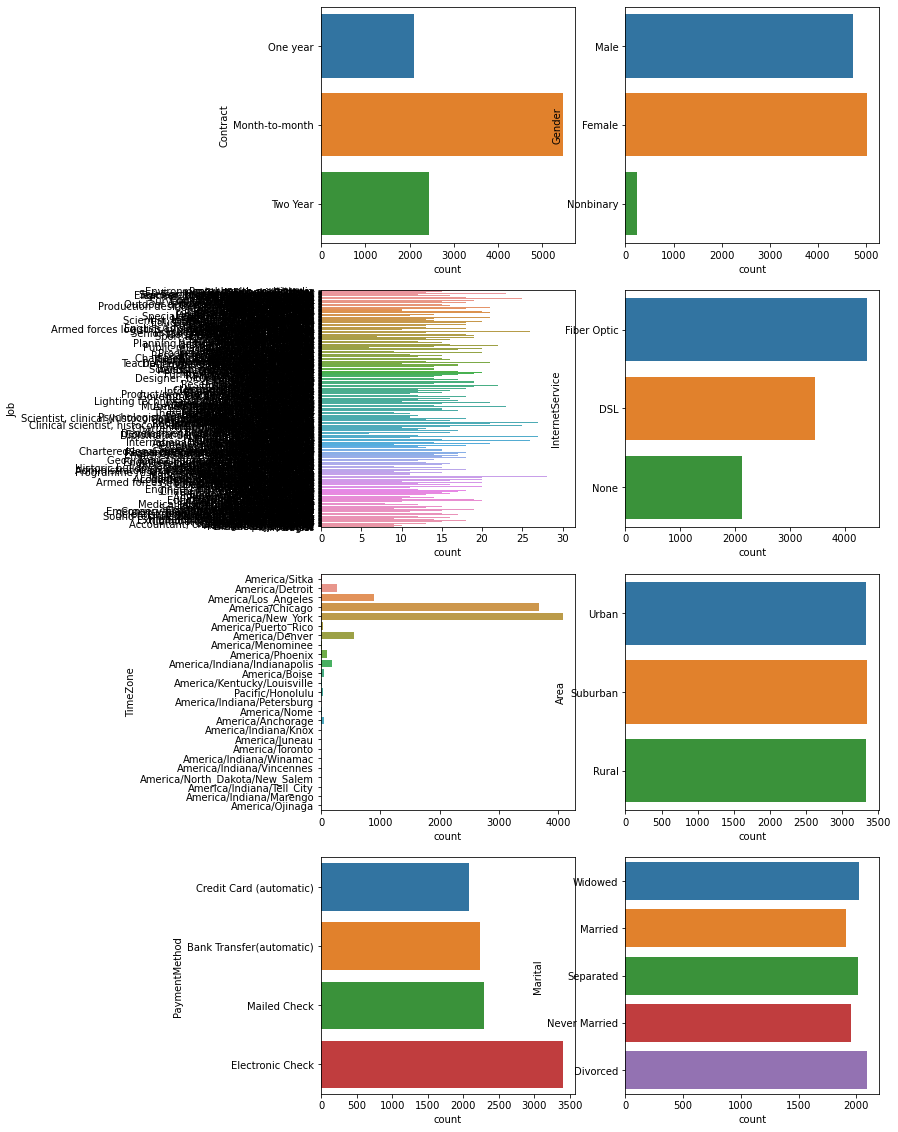

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))

columns = ['Contract', 'Gender', 'Job', 'InternetService', 'TimeZone', 'Area', 'PaymentMethod', 'Marital']

for i, col in enumerate(columns):
    if i < 8:
        plt.subplot(4, 2, i+1)
        sns.countplot(data=churn_data, y=col)
    else:
        plt.subplot(4, 2, i+2)
        sns.countplot(data=churn_data, y=col)

plt.show()

Based on the above visualization, it appears that the Timezone and Job attributes have multiple potential categories that could be separated and as such should also be dropped. On the other hand, the remaining categorical attributes meet our criteria and will be subjected to one hot encoding.

In [8]:
columns_to_drop = ['Job', 'TimeZone']

churn_data = churn_data.drop(columns_to_drop, axis = 1)

In [9]:
# Generate individual variables for each categorical attribute, assigning 0 to rows where the value is absent and 
# 1 where it is present.

churn_data = pd.get_dummies(data=churn_data, columns=['Marital', 'Area', 'Gender', 'InternetService', 
                                                    'PaymentMethod', 'Contract'])

In [10]:
churn_data.head()

,Zip,Lat,Lng,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Area_Rural,Area_Suburban,Area_Urban,Gender_Female,Gender_Male,Gender_Nonbinary,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,99927,56.25100,-133.37571,38,0,68,28561.99,0,7.978323,10,0,1,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,48661,44.32893,-84.24080,10446,1,27,21704.77,1,11.699080,12,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0
2,97148,45.35589,-123.24657,3735,4,50,9609.57,0,10.752800,9,0,1,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
3,92014,32.96687,-117.24798,13863,1,48,18925.23,0,14.913540,15,2,0,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1
4,77461,29.38012,-95.80673,11352,0,83,40074.19,1,8.147417,16,2,1,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0


# Step 8

In [11]:
y_attr = ['Churn']

X = churn_data.drop(y_attr, axis = 1)
y = churn_data['Churn'].values

# Step 9

In [12]:
X = scale(X)

# 














# C4. CLEANED DATA SET

In [13]:
churn_data.to_csv('churn_clean_data_final.csv', index = False, encoding = 'utf-8')

# 











# D1. SPLITTING THE DATA

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.3)

In [15]:
churn_data_cols = churn_data.loc[:, churn_data.columns != 'Churn']
columns = churn_data_cols.columns

churn_data_X_train = pd.DataFrame(X_train, columns=columns)
churn_data_X_test = pd.DataFrame(X_test, columns=columns)
churn_data_y_train = pd.DataFrame(y_train, columns=['Churn'])
churn_data_y_test = pd.DataFrame(y_test, columns=['Churn'])

# Save the test and training data as CSV files
churn_data_X_train.to_csv('churn_data_X_train.xlsx', encoding = 'utf-8', index = False)
churn_data_X_test.to_csv('churn_data_X_test.xlsx', encoding = 'utf-8', index = False)
churn_data_y_train.to_csv('churn_data_y_train.xlsx', encoding = 'utf-8', index = False)
churn_data_y_test.to_csv('churn_data_y_test.xlsx', encoding = 'utf-8', index = False)

#  















# D2. OUTPUT AND INTERMEDIATE CALCULATIONS
The intermediate calculations required for the KNN analysis will be performed in the code blocks provided in section D3 instead of using screenshots. Prior to initiating the KNN analysis, the following preliminary steps will be taken:

- Step 1: Optimal parameters for the model will be created by tuning various hyperparameters of the model.
- Step 2: A five-fold cross-validation will be conducted to assess the accuracy of the model, particularly on unseen data.

#  












# D3. CODE EXECUTION


In [16]:
# Optimal Model (Ref G1)

cv_k_fold = 10
acc = []

range_k = np.arange(1, 11)
neighbors = np.arange(1, 11)


metrics_knn = ['manhattan', 'euclidean', 'minkowski']
param = dict(metric=metrics_knn, n_neighbors=neighbors)

In [17]:
# Tuning Parameters (Ref G2)

model_knn = KNeighborsClassifier()
gscv = GridSearchCV(model_knn, param, cv=10, scoring='accuracy', refit=True)

gscv.fit(X_train, y_train)
opt = gscv.best_estimator_
opt

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [18]:
# 10-fold CV

cv10 = cross_val_score(opt,X,y,cv=5)
print(np.mean(cv10))

0.8216000000000001


In [19]:
# Model Fttting

opt.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [20]:
# Model accuracy

acc = opt.score(X_test, y_test)*100

print("The Model Accuracy is ",  acc, "%")

The Model Accuracy is  83.89999999999999 %


# 






# Part V: Data Summary and Implications

# AUC

In [21]:
# Predicted Probabilities (Ref G3)
    
y_pred_prob = opt.predict_proba(X_test)[:,1]

# Compute cross-validated AUC scores of the model
auc_ = cross_val_score(opt, X, y, scoring = 'roc_auc', cv=10)

# AUC scores
print("Using a 10-fold cross-validation, the AUC scores generated are : {}".format(auc_))
print('\n')

# Mean AUC
print('The model has aa mean AUC value of:', np.mean(auc_))

Using a 10-fold cross-validation, the AUC scores generated are : [0.83589783 0.83396483 0.79661661 0.87617507 0.95991015 0.94135284
 0.94136825 0.93394686 0.9335541  0.77366192]


The model has aa mean AUC value of: 0.8826448466178924


# Confusion Matrix

<AxesSubplot:>

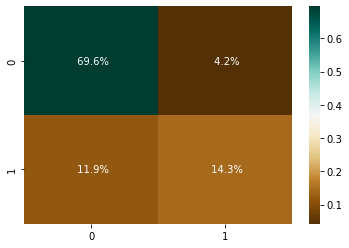

In [22]:
y_pred = opt.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt=' .1%', cmap='BrBG')

# Classification Report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      2215
           1       0.77      0.55      0.64       785

    accuracy                           0.84      3000
   macro avg       0.81      0.74      0.77      3000
weighted avg       0.83      0.84      0.83      3000



# 





# E1. ACCURACY AND AUC

- Based on the provided data, the model demonstrates an accuracy of 0.84, a recall of 0.55, and a precision of 0.77 in predicting the values correctly. 
- Additionally, the test data correctly predicted customer churn 83.9% of the time. 
- The model also achieved an average AUC score of 0.88. 
- AUC, which stands for Area Under the Curve, represents the likelihood of a model to rank a randomly selected positive sample higher than a negative sample (Bhandari, 2020). 
- Thus, a high AUC score of 0.88 indicates a higher probability of the model making correct predictions for customer churn.

# 








# E2. RESULTS AND IMPLICATIONS

# Results

The experiment results indicate that the model performs better in terms of precision, recall, and f1-score when the predicted value is false rather than true. Additionally, the model shows a higher rate of False Negatives, but a lower rate of True Negatives, along with a considerably higher True Positive rate and a very low False Positive rate. The accuracy of the model is also quite high, at 82.68%.



# Implications
Based on the provided information, a model has been developed with a relatively high level of accuracy. This enables telecom companies to almost accurately predict which customers are likely to discontinue their services, and identify the key factors influencing their decisions. This information can be used by stakeholders within these companies to focus on these factors and implement strategies to retain existing customers. By doing so, these companies can potentially reduce customer churn rates and increase overall customer satisfaction.




# 

# E3.  LIMITATION

The model presented in this study has a limitation that should be taken into consideration. Its recall score for correctly predicted values is quite low, at 0.55. This indicates that the model has a low capability of identifying all relevant data points within the dataset, which may affect its overall performance in certain scenarios. (Koehrsen, 2018)

# 






# E4. COURSE OF ACTION

Based on the analysis and observations made, I strongly recommend network companies to utilize this model with their own data to predict customer churn for their existing customers, identify the major factors that contribute to this churn, and take necessary steps to address these issues in order to retain their customers. By doing so, companies can improve their customer retention rate and ultimately enhance their business performance.

# 



# F. PANOPTO RECORDING

# 







# G. SOURCES FOR THIRD-PARTY CODE

 - G1. https://towardsdatascience.com/what-is-cross-validation-60c01f9d9e75
 
 - G2. https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/
 
 - G3. https://www.kaggle.com/kanncaa1/roc-curve-with-k-fold-cv

# 









# H. SOURCES

- H1. Bhandari An (2020, June 16). AUC-ROC Curve in Machine Learning Clearly Explained. Retrieved February 11th 2022 from https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

- H2. Koehrsen W (2018, March 3). Beyond Accuracy: Precision and Recall. Retrieved February 11th 2022 from https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c 

- H3. Grant P (2019, July 21). Introducing k-Nearest Neighbors. Retrieved February 11th 2022 from https://towardsdatascience.com/introducing-k-nearest-neighbors-7bcd10f938c5#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%20is%20a%20common%20classification%20model,between%20the%20two%20data%20points.